### Project Description: 𝗦𝗠𝗦 𝗖𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗲𝗿 𝗣𝗿𝗼𝗷𝗲𝗰𝘁
Develop a text classification model to classify SMS as either 𝘀𝗽𝗮𝗺 𝗼𝗿 𝗻𝗼𝗻-𝘀𝗽𝗮𝗺 using data science techniques in Python.

## Stages to perform this project:

### 1. 𝖣𝖺𝗍𝖺 𝖦𝖺𝗍𝗁𝖾𝗋𝗂𝗇𝗀
### 2. 𝖣𝖺𝗍𝖺 𝖢𝗅𝖾𝖺𝗇𝗂𝗇𝗀
### 3. 𝖤𝗑𝗉𝗅𝗈𝗋𝖺𝗍𝗈𝗋𝗒 𝖣𝖺𝗍𝖺 𝖠𝗇𝖺𝗅𝗒𝗌𝗂𝗌 (𝖤𝖣𝖠)
### 4. 𝖳𝖾𝗑𝗍 𝖯𝗋𝖾𝗉𝗋𝗈𝖼𝖾𝗌𝗌𝗂𝗇𝗀
### 5. 𝖬𝗈𝖽𝖾𝗅 𝖡𝗎𝗂𝗅𝖽𝗂𝗇𝗀
### 6. 𝖤𝗏𝖺𝗅𝗎𝗍𝗂𝗈𝗇 𝗈𝖿 𝖬𝗈𝖽𝖾𝗅
### 7.  𝖶𝖾𝖻𝗌𝗂𝗍𝖾

## Step- 1 Data Gathering

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset:
df = pd.read_csv(r"spam.csv", encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Check the rows and columns:
df.shape

(5572, 5)

## Step- 2 Data Cleaning

In [4]:
# Check the columns name and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop the unncessary columns i.e, last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Renaming columns name because it cannot make any sense
df.rename(columns={'v1': 'target', 'v2' : 'text'}, inplace=True)

In [8]:
# See the top 5 rows:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Apply labelEncoder for the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

### Note: 
0 denote "ham"

1 denote "spam

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check missing values:
df.isnull().sum()

# There is no missing values

target    0
text      0
dtype: int64

In [13]:
# Check the duplicate values:

df.duplicated().sum()

# There are 403 duplicate values

403

In [14]:
# Remove the 403 duplicate values:

df = df.drop_duplicates(keep="first")

In [15]:
# Recheck after drop duplicate values

df.duplicated().sum()

# Now, there is no duplicate values

0

## Step- 3 Exploratory Data Analysis (EDA)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Check how many of messages are spam and ham:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

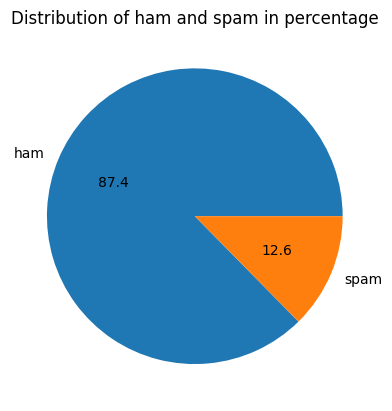

In [18]:
# Represent the number of messages which are spam and ham using MATPLOTLIB

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.1f")
plt.title('Distribution of ham and spam in percentage')
plt.show()

## Step- 4 Textpreprocessing using NLTK library

### To summarize the task using the NLTK library:

① Counting Characters: Use NLTK to count the number of alphabets in the SMS text.

② Counting Words: Utilize NLTK to count the number of words in the SMS text.

③ Counting Sentences: Employ NLTK to count the number of sentences in the SMS text.

AND DO ANALYSIS

In [19]:
# nltk - Natural Language Toolkit 

In [20]:
! pip install nltk

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Check Number of Characters:

In [22]:
df['num_characters'] = df['text'].apply(len)
df.head()

C:\Users\ramir\AppData\Local\Temp\ipykernel_18636\83982535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Check Number of Words

In [23]:
# Use of nltk library
df['num_words'] = df['text'].apply(nltk.word_tokenize)
df

C:\Users\ramir\AppData\Local\Temp\ipykernel_18636\135031446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(nltk.word_tokenize)


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,..."


In [24]:
# Count number of words in each SMS text
df['num_words'] = df['num_words'].apply(len)
df

C:\Users\ramir\AppData\Local\Temp\ipykernel_18636\534975946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['num_words'].apply(len)


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


### Check Number of Sentences:

In [25]:
df['num_sentences'] = df['text'].apply(nltk.sent_tokenize)
df

C:\Users\ramir\AppData\Local\Temp\ipykernel_18636\3220978171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(nltk.sent_tokenize)


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,[This is the 2nd time we have tried 2 contact ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,[Will Ì_ b going to esplanade fr home?]
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,"[Pity, * was in mood for that., So...any other..."
5570,0,The guy did some bitching but I acted like i'd...,125,27,[The guy did some bitching but I acted like i'...


In [26]:
# Count number of sentence in each sms text

df['num_sentences'] = df['num_sentences'].apply(len)
df.head()

C:\Users\ramir\AppData\Local\Temp\ipykernel_18636\2788640258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['num_sentences'].apply(len)


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# See the descriptive statistics data:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
# See ham messages:
df.loc[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [29]:
# See spam messages:
df.loc[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


### Note:
The Descriptive Statistics of ham and spam messages indicate that, on average, spam messages tend to be slightly larger in size compared to ham messages.

### Characters:

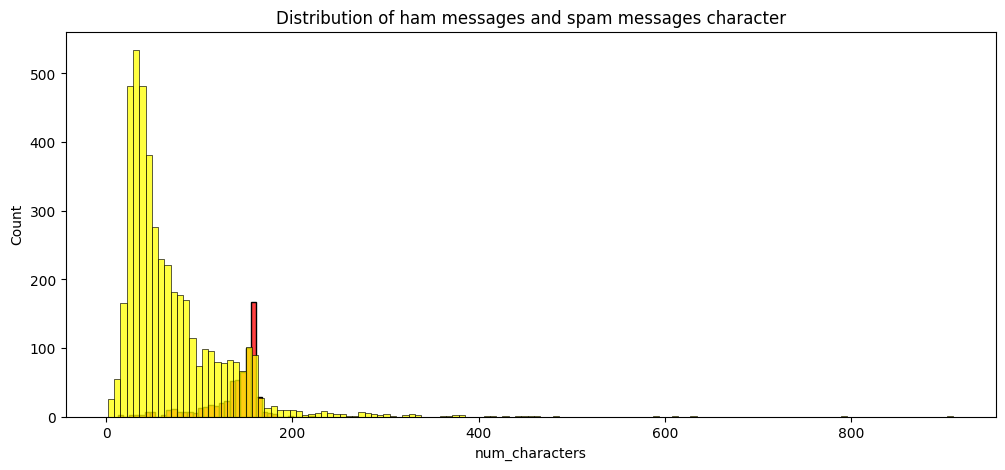

In [30]:
# See the histplot of ham messages and spam messages:
plt.figure(figsize=(12,5))
ham_messages = df.loc[df['target']==0][['num_characters']]            # ham messages
spam_messages = df.loc[df['target']==1][['num_characters']]           # spam messages
sns.histplot(spam_messages['num_characters'], color='Red')
sns.histplot(ham_messages['num_characters'], color='Yellow')
plt.title('Distribution of ham messages and spam messages character')
plt.show()

### Words:

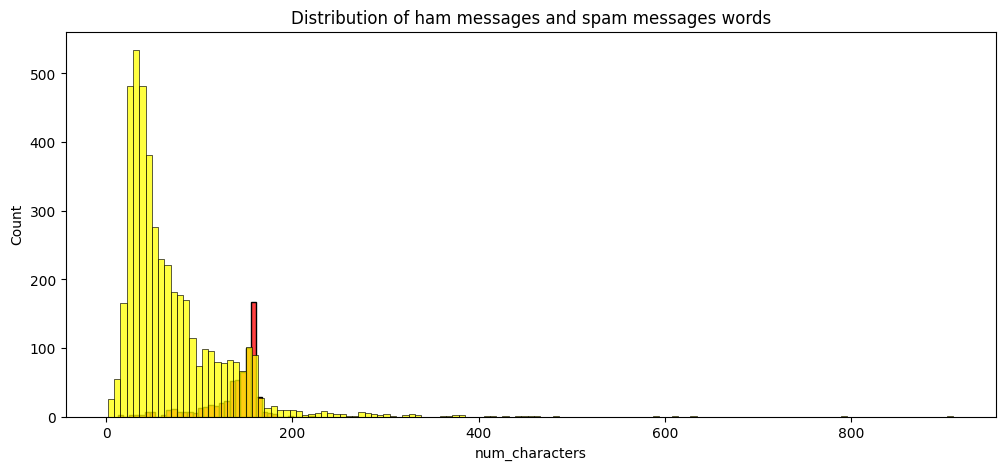

In [31]:
# See the histplot of ham messages and spam messages:
plt.figure(figsize=(12,5))
ham_messages = df.loc[df['target']==0][['num_characters']]            # ham messages
spam_messages = df.loc[df['target']==1][['num_characters']]           # spam messages
sns.histplot(spam_messages['num_characters'], color='Red')
sns.histplot(ham_messages['num_characters'], color='Yellow')
plt.title('Distribution of ham messages and spam messages words')
plt.show()

### Finding relation between Number of characters and Number of words:

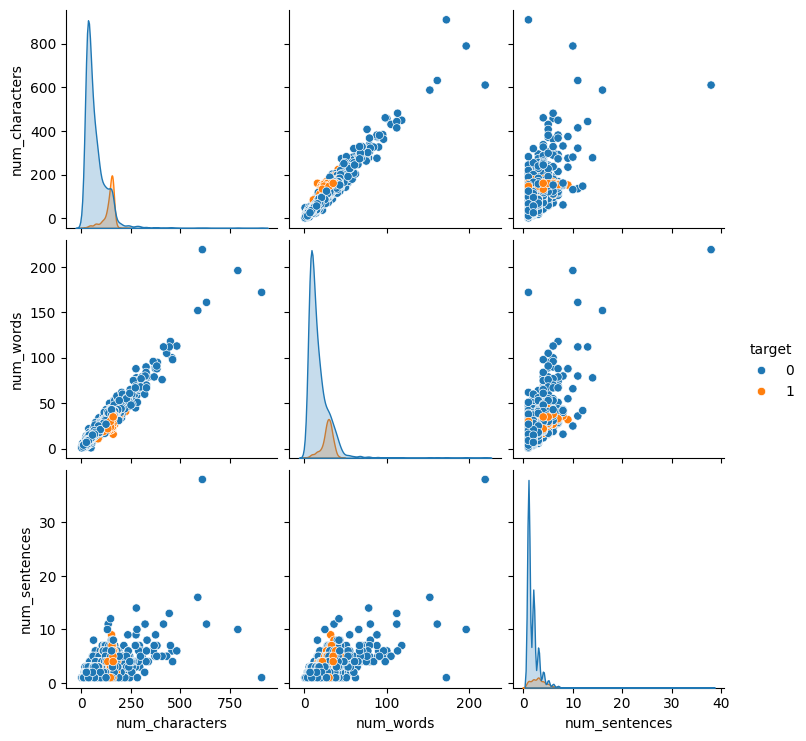

In [32]:
sns.pairplot(df, hue='target')
plt.show()

By seeing the above pairplot we can say that there are some outlier in the dataset.

### Correlation Coefficient

In [33]:
df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


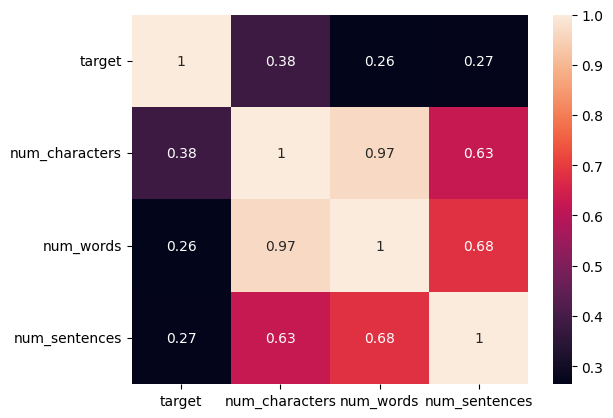

In [34]:
## Use heatmap for better understanding:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)    
plt.show()

NOTE: annot=True in a heatmap function adds numerical annotations to each cell of the heatmap for improved data interpretation.

### Analyze by the above Heatmap:
The correlation analysis indicates that there is a positive correlation of 𝟬.𝟯𝟴 between the number of characters in a message and the likelihood of it being classified as spam. This suggests that as the number of characters in a message increases, there is a tendency for it to be classified as spam, potentially due to certain characteristics or patterns associated with longer messages in the context of spam classification.

𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 - The decision to use the "num_characters" column in model creation is driven by its correlation coefficient of 𝟬.𝟯𝟴 with the target variable, indicating a stronger association compared to "num_words" and "num_sentences."

## Data Preprocessing:
The below code is performing data preprocessing on the DataFrame. It includes steps like removing punctuation, converting text to lowercase, splitting text into words, and lemmatizing the words.
### ‣ Lower case -  𝐶𝑜𝑛𝑣𝑒𝑟𝑡 𝑣𝑎𝑙𝑢𝑒𝑠 𝑖𝑛 𝑙𝑜𝑤𝑒𝑟 𝑐𝑎𝑠𝑒.
### ‣ Tokenization -  𝘱𝘳𝘰𝘤𝘦𝘴𝘴 𝘰𝘧 𝘣𝘳𝘦𝘢𝘬𝘪𝘯𝘨 𝘥𝘰𝘸𝘯 𝘵𝘦𝘹𝘵 𝘪𝘯𝘵𝘰 𝘴𝘮𝘢𝘭𝘭𝘦𝘳 𝘶𝘯𝘪𝘵𝘴⸴ 𝘴𝘶𝘤𝘩 𝘢𝘴 𝘸𝘰𝘳𝘥𝘴
### ‣  Removing special characters -
     Eg: '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'  etc.
 
### ‣ Removing stopwords and punctuation - 
     Eg: (a, an, the, and, but, or, in, on, at, by, with, from, to, of, for, I, you, he, she, it, we, they, me, him, her,
           us, them, is, are, am, was, were, be, being, been, have, has, had, do, does, did, will, would, shall, should,
           can, could, may, might, must) etc.
           
### ‣ Stemming - Involves 𝙇𝙚𝙢𝙢𝙞𝙯𝙖𝙩𝙞𝙤𝙣
     To reduce words to their base or root form, ensuring consistency and simplification for analysis, such as converting variations like "dancing," "dance," and "danced" to their common base form "dance" to streamline text processing and analysis.

In [35]:
from nltk.corpus import stopwords       # 𝙨𝙩𝙤𝙥𝙬𝙤𝙧𝙙𝙨 module is used to access a list of common stopwords in various languages
from nltk.stem.porter import PorterStemmer
import string                           # Import string
ps = PorterStemmer()

In [36]:
def transform_text(text):
    text = text.lower()                 # Converting text to lowercase
    text = nltk.word_tokenize(text)     # Doing tokenize to break down text into small words of list
    
    y = []                    
    for i in text:
        if i.isalnum():                 # Removing special characters
            y.append(i)
              
    text = y[:]                    # Assign text to y                                  
    y.clear()                      # Clear the y
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:     # Removing stopwords and punctuation
            y.append(i)
            
            
    text = y[:]                    # Again, Assign text to y
    y.clear()                      # And clear the y
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)             # Joining of list of data into a single string

In [39]:
import nltk
nltk.download('stopwords')

def transform_text(text):
    # Your text transformation logic here
    pass

# Example usage
transformed_text = transform_text("I loved the YT lectures on Machine Learning. How about you?")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word Cloud

### 𝐍𝐨𝐰 𝐰𝐞 𝐜𝐚𝐧 𝐰𝐨𝐫𝐤𝐢𝐧𝐠 𝐭𝐨 𝐟𝐢𝐧𝐝 𝐓𝐨𝐩 𝐰𝐨𝐫𝐝𝐬 𝐰𝐡𝐢𝐜𝐡 𝐚𝐫𝐞 𝐮𝐬𝐞𝐝 𝐢𝐧 𝐡𝐚𝐦 𝐚𝐧𝐝 𝐬𝐩𝐚𝐦 𝐦𝐞𝐬𝐬𝐚𝐠𝐞𝐬 𝐚𝐧𝐝 𝐮𝐬𝐞 𝐰𝐨𝐫𝐝 𝐜𝐥𝐨𝐮𝐝 𝐭𝐨 𝐬𝐡𝐨𝐰 𝐭𝐡𝐞 𝐫𝐞𝐩𝐫𝐞𝐬𝐞𝐧𝐭𝐚𝐭𝐢𝐨𝐧:

In [ ]:
! pip install wordCloud

### Top words in spam messages:

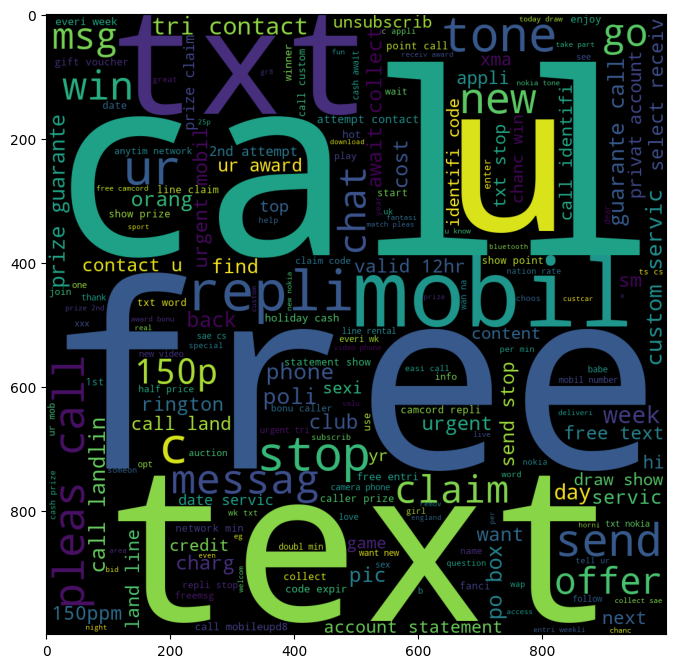

In [ ]:
plt.figure(figsize=(8,15))
from wordcloud import WordCloud         # Use wordcloud module to show the top text word used in ham and spam messages
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='Black')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))    # Use generate function, and 1 for "spam"
plt.imshow(spam_wc)                     # To show the word cloud chart

### Top words in ham messages:

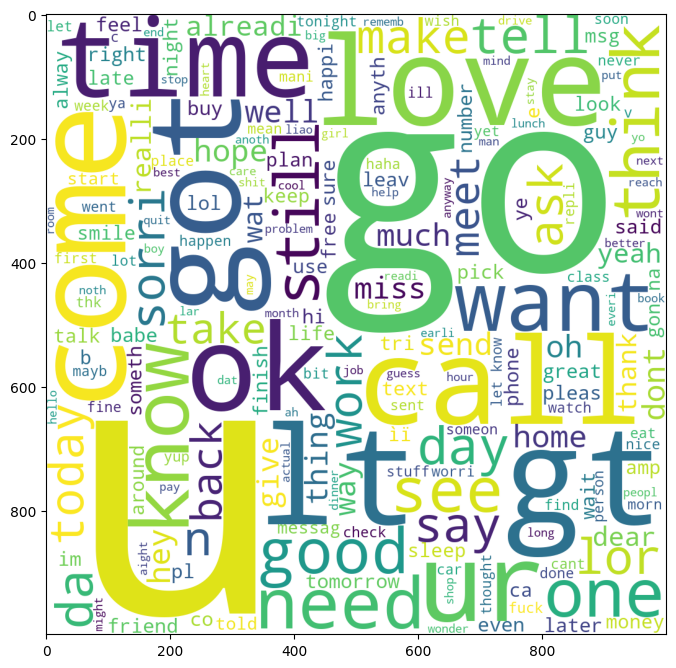

In [ ]:
plt.figure(figsize=(8, 15))
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)                 # To show the word cloud chart

### 𝐓𝐨𝐩 40 𝐰𝐨𝐫𝐝𝐬 𝐮𝐬𝐞 𝐢𝐧 𝐬𝐩𝐚𝐦 𝐦𝐞𝐬𝐬𝐚𝐠𝐞:

In [ ]:
df.loc[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

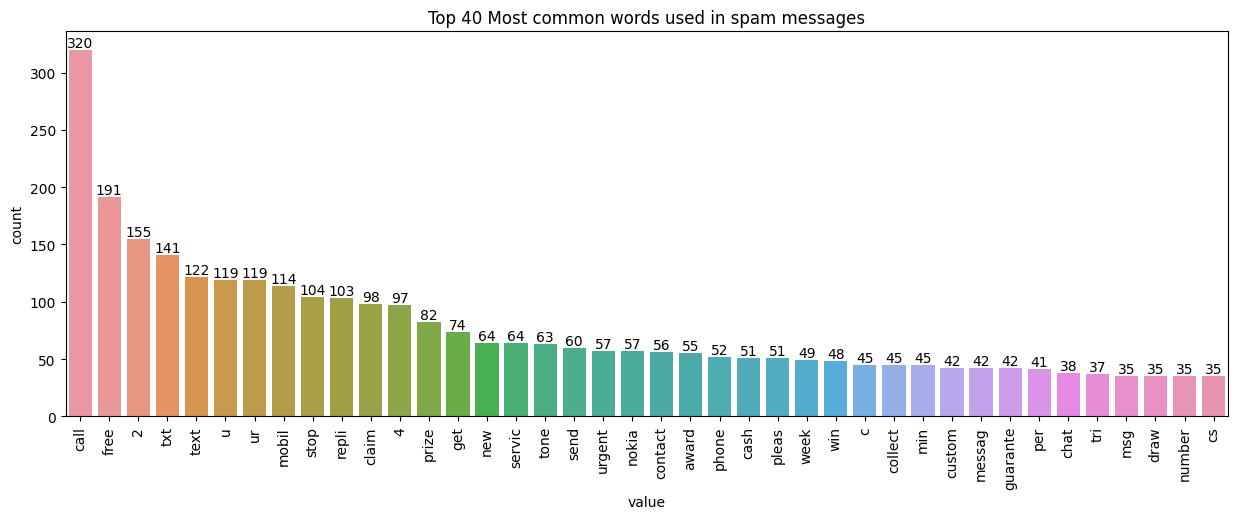

In [ ]:
plt.figure(figsize=(15,5))
from collections import Counter      # Use Counter module
spam_words = []
for message in df.loc[df['target']==1]['transformed_text'].tolist():
    for words in message.split():
        spam_words.append(words)
        
spam_data = pd.DataFrame(Counter(spam_words).most_common(40), columns=['value', 'count'])    # Most 30 common words
ax = sns.barplot(x='value', y='count', data=spam_data)
plt.title('Top 40 Most common words used in spam messages')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

### 𝐓𝐨𝐩 40 𝐰𝐨𝐫𝐝𝐬 𝐮𝐬𝐞 𝐢𝐧 𝐡𝐚𝐦 𝐦𝐞𝐬𝐬𝐚𝐠𝐞:

In [ ]:
df.loc[df['target']==0]['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 4516, dtype: object

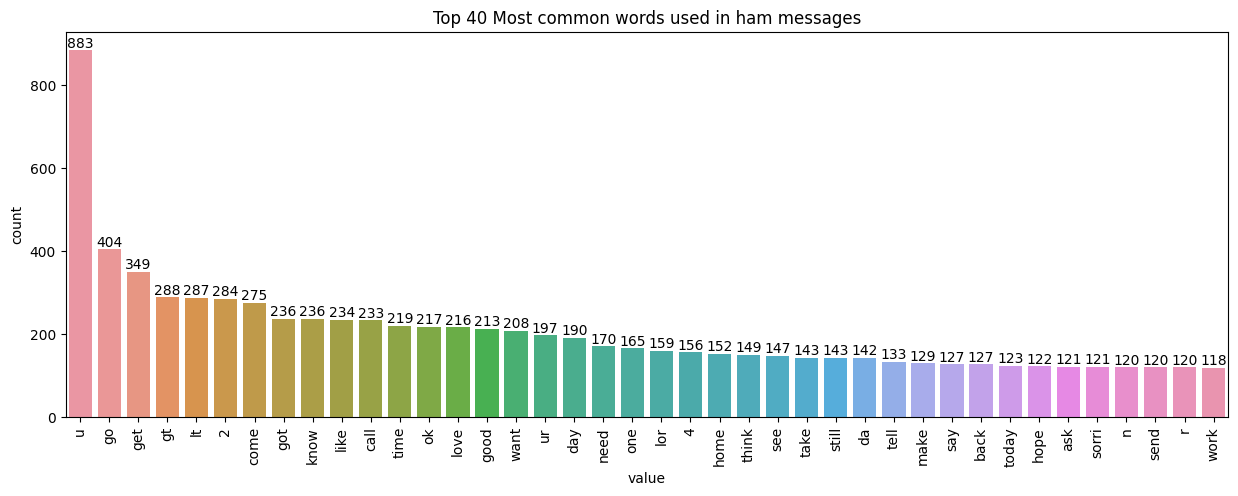

In [ ]:
plt.figure(figsize=(15,5))
from collections import Counter
ham_words = []
for messages in df.loc[df['target']==0]['transformed_text'].tolist():
    for words in messages.split():
        ham_words.append(words)

ham_data = pd.DataFrame(Counter(ham_words).most_common(40), columns=['value', 'count'])    # Most 30 common words
ax = sns.barplot(x='value', y='count', data=ham_data)
plt.title('Top 40 Most common words used in ham messages')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

## Step- 5 Model Building

### Naive Bayes Algorithmn
For an SMS classifier project, Naive Bayes algorithms is suitable choice due to the nature of textual data and the simplicity of the algorithm.

𝐈𝐧𝐩𝐮𝐭: transformed_text (𝙏𝙖𝙨𝙠 𝙩𝙤 𝙘𝙤𝙣𝙫𝙚𝙧𝙩 𝙞𝙣𝙩𝙤 𝙣𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 𝙫𝙖𝙡𝙪𝙚)

𝐎𝐮𝐭𝐩𝐮𝐭: target

### Nᴏᴛᴇ: 
For building machine learning model the input data should be numerical/ vector, but here 'transformed_text' is in  string 
format so we have deal with it using "bag of words".

# 𝗖𝗼𝘂𝗻𝘁𝗩𝗲𝗰𝘁𝗼𝗿𝗶𝘇𝗲𝗿
𝐖𝐡𝐚𝐭 𝐢𝐬 𝐛𝐚𝐠 𝐨𝐟 𝐰𝐨𝐫𝐝𝐬 (𝗖𝗼𝘂𝗻𝘁𝗩𝗲𝗰𝘁𝗼𝗿𝗶𝘇𝗲𝗿)?

The bag of words model simplifies text into numbers by counting how often words appear, making it easier for computers to analyze and process text data for tasks like classification and analysis.

In [ ]:
# Use of 𝗖𝗼𝘂𝗻𝘁𝗩𝗲𝗰𝘁𝗼𝗿𝗶𝘇𝗲𝗿 class from 𝘀𝗸𝗹𝗲𝗮𝗿𝗻.𝗳𝗲𝗮𝘁𝘂𝗿𝗲_𝗲𝘅𝘁𝗿𝗮𝗰𝘁𝗶𝗼𝗻.𝘁𝗲𝘅𝘁 module for converting collection of text documents into a
# matrix of token counts.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer()

X1 = cv.fit_transform(df['transformed_text']).toarray()

print("SMS:", X1.shape[0])
print("Total Words:", X1.shape[1])

SMS: 5169
Total Words: 6708


In [ ]:
print(X1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
y1 = df['target'].values
y1

array([0, 0, 1, ..., 0, 0, 0])

### Now we apply train-test split()

In [ ]:
from sklearn.model_selection import train_test_split

## Why we use?

Naive Bayes classifiers, such as MultinomialNB and BernoulliNB, are commonly used for SMS classifier projects because they are efficient, easy to implement, effective for text classification tasks, handle sparse data well, scale to large datasets, and achieve good performance in practice.

###  𝐃𝐢𝐟𝐟𝐞𝐫𝐞𝐧𝐜𝐞 𝐛𝐞𝐭𝐰𝐞𝐞𝐧 𝐭𝐡𝐞𝐬𝐞 𝐍𝐚𝐢𝐲𝐞 𝐁𝐚𝐲𝐞𝐬 𝐀𝐥𝐠𝐨𝐫𝐢𝐭𝐡𝐦𝐧𝐬❓
• 𝗚𝗮𝘂𝘀𝘀𝗶𝗮𝗻𝗡𝗕 works with data that looks like a bell curve, 𝗺𝗲𝗮𝗻𝘀: it is typically used for features that are continuous or real-valued.

• 𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹𝗡𝗕 works with counting occurrences, like words in text.

• 𝗕𝗲𝗿𝗻𝗼𝘂𝗹𝗹𝗶𝗡𝗕 works with situations where you're just interested in whether something happens or not, like yes or no questions.


### 𝗪𝗵𝘆 𝘄𝗲 𝘂𝘀𝗲 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻_𝘀𝗰𝗼𝗿𝗲❓
𝗥𝗘𝗔𝗦𝗢𝗡: Precision help to make sure that SMS classifier is accurate in catching spam while avoiding mistakes that could 
upset users or miss business goals.



In [ ]:
# Import all the Naive Bayes Algorithmn because I don't know the distribution of data.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=2)   # 20% data for test
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb1 = GaussianNB()                
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

### Gaussian Naive Bayes (GaussianNB):

In [ ]:
gnb1.fit(X1_train, y1_train)                                         # train the model
y1_predict1 = gnb1.predict(X1_test)
print("accuracy score:", accuracy_score(y1_test, y1_predict1))      # The accuracy is 88%
print("confusion_matrix:", confusion_matrix(y1_test, y1_predict1))
print("precision_score:", precision_score(y1_test, y1_predict1))    # The precision score is 53%

accuracy score: 0.8800773694390716
confusion_matrix: [[792 104]
 [ 20 118]]
precision_score: 0.5315315315315315


𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 𝗧𝗔𝗞𝗘𝗡- The 𝗚𝗮𝘂𝘀𝘀𝗶𝗮𝗻 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier achieved an 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 of 𝟖𝟖%, indicating reasonable overall performance. However, its 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟬.𝟱𝟯 suggests it struggles to accurately identify spam, potentially leading to a significant number of false positives. 
Given the importance of precision in spam detection to maintain user satisfaction, I choose not to use the 𝗚𝗮𝘂𝘀𝘀𝗶𝗮𝗻 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier.

### Multinomial Naive Bayes (MultinomialNB):

In [ ]:
mnb1.fit(X1_train, y1_train)
y1_predict2 = mnb1.predict(X1_test)
print("accuracy score:", accuracy_score(y1_test, y1_predict2))      # The accuracy is 96%
print("confusion_matrix:", confusion_matrix(y1_test, y1_predict2))  
print("precision_score:", precision_score(y1_test, y1_predict2))    # The precision score is 83%

accuracy score: 0.9642166344294004
confusion_matrix: [[871  25]
 [ 12 126]]
precision_score: 0.8344370860927153


𝗡𝗼𝘁𝗲: I need to focus on 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻_𝘀𝗰𝗼𝗿𝗲 first rather than accuracy because the data are imbalanced.

𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 𝗧𝗔𝗞𝗘𝗡- The 𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier achieved an 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 of 𝟵𝟲%, indicating reasonable overall performance. However, its 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟬.𝟴𝟯 suggests it struggles to accurately identify spam, potentially leading to a significant number of false positives. 
Given the importance of precision in spam detection to maintain user satisfaction, I choose not to use the 𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier.

### Bernoulli Naive Bayes (BernoulliNB) 

In [ ]:
bnb1.fit(X1_train, y1_train)
y1_predict3 = bnb1.predict(X1_test)
print("accuracy score:", accuracy_score(y1_test, y1_predict3))      # The accuracy is 97%
print("confusion_matrix:", confusion_matrix(y1_test, y1_predict3))
print("precision_score:", precision_score(y1_test, y1_predict3))    # The precision score is 97%

accuracy score: 0.9700193423597679
confusion_matrix: [[893   3]
 [ 28 110]]
precision_score: 0.9734513274336283


𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 𝗧𝗔𝗞𝗘𝗡- The 𝗕𝗲𝗿𝗻𝗼𝘂𝗹𝗹𝗶 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier achieved an 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 of 𝟵𝟳%, indicating reasonable overall performance 
and the 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟬.𝟵𝟳 indicates that 𝗕𝗲𝗿𝗻𝗼𝘂𝗹𝗹𝗶 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 is better than rest of the two algorithmn.

#  𝐓𝐟𝐢𝐝𝐟𝐕𝐞𝐜𝐭𝐨𝐫𝐢𝐳𝐞𝐫
#### What is 𝐓𝐟𝐢𝐝𝐟𝐕𝐞𝐜𝐭𝐨𝐫𝐢𝐳𝐞𝐫?
𝐓𝐟𝐢𝐝𝐟𝐕𝐞𝐜𝐭𝐨𝐫𝐢𝐳𝐞𝐫 is a tool in natural language processing that transforms text data into numbers for machine learning. 𝗜𝘁 𝗮𝘀𝘀𝗶𝗴𝗻𝘀 𝘀𝗰𝗼𝗿𝗲𝘀 𝘁𝗼 𝘄𝗼𝗿𝗱𝘀 𝗯𝗮𝘀𝗲𝗱 𝗼𝗻 𝘁𝗵𝗲𝗶𝗿 𝗶𝗺𝗽𝗼𝗿𝘁𝗮𝗻𝗰𝗲 𝗶𝗻 𝗲𝗮𝗰𝗵 𝗱𝗼𝗰𝘂𝗺𝗲𝗻𝘁 𝗮𝗻𝗱 𝗮𝗰𝗿𝗼𝘀𝘀 𝘁𝗵𝗲 𝗲𝗻𝘁𝗶𝗿𝗲 𝗱𝗮𝘁𝗮𝘀𝗲𝘁. This helps algorithms understand the context and significance of words. In short, TfidfVectorizer makes text data understandable for machine learning algorithms by giving numerical importance to words.

In [ ]:
# Use of 𝐓𝐟𝐢𝐝𝐟𝐕𝐞𝐜𝐭𝐨𝐫𝐢𝐳𝐞𝐫 class from 𝘀𝗸𝗹𝗲𝗮𝗿𝗻.𝗳𝗲𝗮𝘁𝘂𝗿𝗲_𝗲𝘅𝘁𝗿𝗮𝗰𝘁𝗶𝗼𝗻.𝘁𝗲𝘅𝘁 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)                     # Use max 3000 words

X = tfidf.fit_transform(df['transformed_text']).toarray()

print(X.shape)

(5169, 3000)


In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

### Now we apply train-test split()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Import all the Naive Bayes Algorithmn because I don't know the distribution of data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)   # 20% data for test
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


# Why we use precision_score?
# Rᴇᴀsᴏɴ: Precision help to make sure that SMS classifier is accurate in catching spam while avoiding mistakes that could 
# upset users or miss business goals.


gnb = GaussianNB()                
mnb = MultinomialNB()
bnb = BernoulliNB()

### Gaussian Naive Bayes (GaussianNB):

In [ ]:
gnb.fit(X_train, y_train)                                         # train the model
y_pred1 = gnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred1))      # The accuracy is 86%
print("confusion_matrix:", confusion_matrix(y_test, y_pred1))
print("precision_score:", precision_score(y_test, y_pred1))    # The precision score is 50%

accuracy score: 0.8694390715667312
confusion_matrix: [[788 108]
 [ 27 111]]
precision_score: 0.5068493150684932


𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 𝗧𝗔𝗞𝗘𝗡- The 𝗚𝗮𝘂𝘀𝘀𝗶𝗮𝗻 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier achieved an 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 of 𝟴𝟳%, indicating reasonable overall performance. However, its 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟬.𝟱𝟬 suggests it struggles to accurately identify spam, potentially leading to a significant number of false positives. 
Given the importance of precision in spam detection to maintain user satisfaction, I choose not to use the 𝗚𝗮𝘂𝘀𝘀𝗶𝗮𝗻 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier.

### Multinomial Naive Bayes (MultinomialNB):

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred2))      # The accuracy is 97%
print("confusion_matrix:", confusion_matrix(y_test, y_pred2))  
print("precision_score:", precision_score(y_test, y_pred2))    # The precision score is 1.0%

accuracy score: 0.9709864603481625
confusion_matrix: [[896   0]
 [ 30 108]]
precision_score: 1.0


𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 𝗧𝗔𝗞𝗘𝗡- The 𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier achieved an 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 of 97%, indicating reasonable overall performance
and 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟭.𝟬 which means that 𝘁𝗵𝗶𝘀 𝗺𝗼𝗱𝗲𝗹 𝗱𝗼𝗻❜𝘁 𝗴𝗶𝘃𝗲 𝗮𝗻𝘆 𝗙𝗮𝗹𝘀𝗲 𝗽𝗼𝘀𝗶𝘁𝗶𝘃𝗲 and it is suitable also.

### Bernoulli Naive Bayes (BernoulliNB) 

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred3))      # The accuracy is 98%
print("confusion_matrix:", confusion_matrix(y_test, y_pred3))
print("precision_score:", precision_score(y_test, y_pred3))    # The precision score is 99%

accuracy score: 0.9835589941972921
confusion_matrix: [[895   1]
 [ 16 122]]
precision_score: 0.991869918699187


𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 𝗧𝗔𝗞𝗘𝗡- The 𝗕𝗲𝗿𝗻𝗼𝘂𝗹𝗹𝗶 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 classifier achieved an 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 of 98%, indicating reasonable overall performance 
and the 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟬.𝟵𝟵 indicates that 𝗕𝗲𝗿𝗻𝗼𝘂𝗹𝗹𝗶 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 is better than rest of the two algorithmn.

## 𝗥𝗜𝗚𝗛𝗧 𝗡𝗢𝗪 𝗗𝗘𝗖𝗜𝗦𝗜𝗢𝗡 

The 𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 (𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹𝗡𝗕) with 𝐓𝐟𝐢𝐝𝐟𝐕𝐞𝐜𝐭𝐨𝐫𝐢𝐳𝐞𝐫 are best fit for the 𝗦𝗠𝗦-𝗖𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗲𝗿 𝗣𝗿𝗼𝗷𝗲𝗰𝘁 due to its 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟭.𝟬 and 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 𝗶𝘀 𝟵𝟱%, indicating that 𝘁𝗵𝗶𝘀 𝗺𝗼𝗱𝗲𝗹 𝗱𝗼𝗻❜𝘁 𝗴𝗶𝘃𝗲 𝗮𝗻𝘆 𝗙𝗮𝗹𝘀𝗲 𝗣𝗼𝘀𝗶𝘁𝗶𝘃𝗲.

However, I'm  exploring other algorithms to determine if any of them might be suitable for the 𝗦𝗠𝗦 𝗖𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗲𝗿 𝗣𝗿𝗼𝗷𝗲𝗰𝘁.

##  𝗘𝗫𝗣𝗟𝗢𝗥𝗘:
### 𝐋𝐨𝐠𝐢𝐬𝐭𝐢𝐜𝐑𝐞𝐠𝐫𝐞𝐬𝐬𝐢𝐨𝐧
### 𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧𝐓𝐫𝐞𝐞𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫
### 𝐊𝐍𝐞𝐢𝐠𝐡𝐛𝐨𝐫𝐬𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫
### 𝐑𝐚𝐧𝐝𝐨𝐦𝐅𝐨𝐫𝐞𝐬𝐭𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating object:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
# Creating a dictionary to hold the classifier:
# keys   -> Algorithmn name
# values -> object name
classifiers = {
    'LR' : lrc,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc
}

In [ ]:
def train_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision 

In [ ]:
train_classifier(lrc, X_train, y_train, X_test, y_test)

(0.9584139264990329, 0.9702970297029703)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, classifier in classifiers.items():
    current_accuracy, current_precision = train_classifier(classifier, X_train, y_train, X_test, y_test)
    
    print("For:", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For: LR
Accuracy: 0.9584139264990329
Precision: 0.9702970297029703
For: DT
Accuracy: 0.9294003868471954
Precision: 0.8282828282828283
For: KN
Accuracy: 0.9052224371373307
Precision: 1.0
For: RF
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829


In [ ]:
performance_df = pd.DataFrame({'algorithm' : classifiers.keys(), 'accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df.sort_values('Precision', ascending=False)

,algorithm,accuracy,Precision
2,KN,0.905222,1.000000
3,RF,0.975822,0.982906
0,LR,0.958414,0.970297
1,DT,0.929400,0.828283


## 𝐅𝐈𝐍𝐀𝐋 𝐃𝐄𝐂𝐈𝐒𝐈𝐎𝐍

### 𝗕𝘆 𝗲𝘅𝗮𝗺𝗶𝗻𝗲 𝗮𝗻𝗱 𝗰𝗼𝗺𝗽𝗮𝗿𝗲 𝘁𝗵𝗲 𝗽𝗲𝗿𝗳𝗼𝗿𝗺𝗮𝗻𝗰𝗲 𝗼𝗳 𝗱𝗶𝗳𝗳𝗲𝗿𝗲𝗻𝘁 𝗮𝗹𝗴𝗼𝗿𝗶𝘁𝗵𝗺𝘀 
I can say that only the 𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹 𝗡𝗮𝗶𝘃𝗲 𝗕𝗮𝘆𝗲𝘀 (𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹𝗡𝗕) with 𝐓𝐟𝐢𝐝𝐟𝐕𝐞𝐜𝐭𝐨𝐫𝐢𝐳𝐞𝐫 have 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 of 𝟭.𝟬 and
𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 𝗶𝘀 𝟵𝟱% which is best for 𝗦𝗠𝗦-𝗖𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗲𝗿 𝗣𝗿𝗼𝗷𝗲𝗰𝘁, while 𝗞𝗡𝗲𝗮𝗿𝗲𝘀𝘁 𝗡𝗲𝗶𝗴𝗵𝗯𝗼𝗿 (𝗞𝗡𝗡) 𝗰𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗲𝗿 also achieves a 𝗽𝗿𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝘀𝗰𝗼𝗿𝗲 
of  𝟭.𝟬, but its 𝗮𝗰𝗰𝘂𝗿𝗮𝗰𝘆 𝗳𝗮𝗹𝗹𝘀 𝘀𝗵𝗼𝗿𝘁 𝗰𝗼𝗺𝗽𝗮𝗿𝗲𝗱 𝘁𝗼 𝗠𝘂𝗹𝘁𝗶𝗻𝗼𝗺𝗶𝗮𝗹𝗡𝗕 𝘄𝗶𝘁𝗵 𝗧𝗳𝗶𝗱𝗳𝗩𝗲𝗰𝘁𝗼𝗿𝗶𝘇𝗲𝗿, rendering it less suitable for 𝗦𝗠𝗦-𝗖𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗲𝗿 𝗣𝗿𝗼𝗷𝗲𝗰𝘁.

### PICKLE
Pickle in Python is primarily used in serialzing and deserializing a Python Object structure. In other words, it's the process
of converting a Python object into a byte stream (0,1) to store it in a file/database, maintain program state acrros session,
or transport data over the network.

𝗦𝗲𝗿𝗶𝗮𝗹𝗶𝘇𝗶𝗻𝗴: Converting a Python object into a byte stream. (𝗣𝗶𝗰𝗸𝗹𝗲)

In [ ]:
import pickle  # Import the pickle module for serialization

# Serialize and save the 'tfidf' object to a file named 'vectorizer.pkl'
# 'wb'(write binary) mode is used for writing the file in binary mode
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))  # Serialize tfidf and save to 'vectorizer.pkl'

# Serialize and save the 'mnb' object to a file named 'model.pkl'
# 'wb' mode is used for writing the file in binary mode
pickle.dump(mnb, open('model.pkl', 'wb'))  # Serialize mnb and save to 'model.pkl'